## Import required libraries.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
from sklearn import preprocessing
from folium.plugins import HeatMap

## Show dataset summary

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')
print(df.info())
print("number of rows is:", df.shape[0]+1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data samples

In [271]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Main attributes histograms.

Text(0, 0.5, 'Frequency')

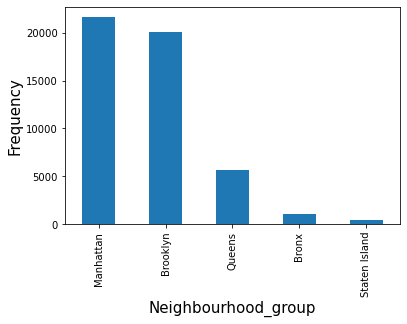

In [272]:
df["neighbourhood_group"].value_counts().plot(kind="bar")
plt.xlabel("Neighbourhood_group", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

Text(0, 0.5, 'Frequency')

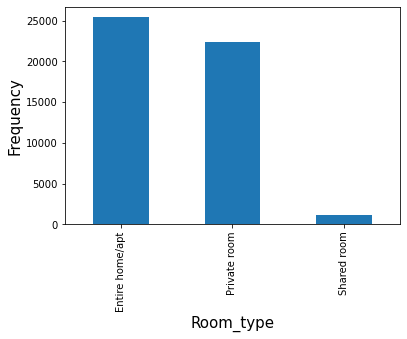

In [273]:
df["room_type"].value_counts().plot(kind="bar")
plt.xlabel("Room_type", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

Text(0, 0.5, 'Frequency')

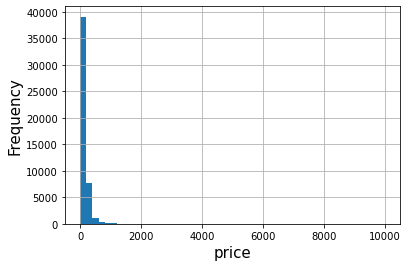

In [274]:
df["price"].hist(bins=50)
plt.xlabel("price", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)

array([[<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>],
       [<AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

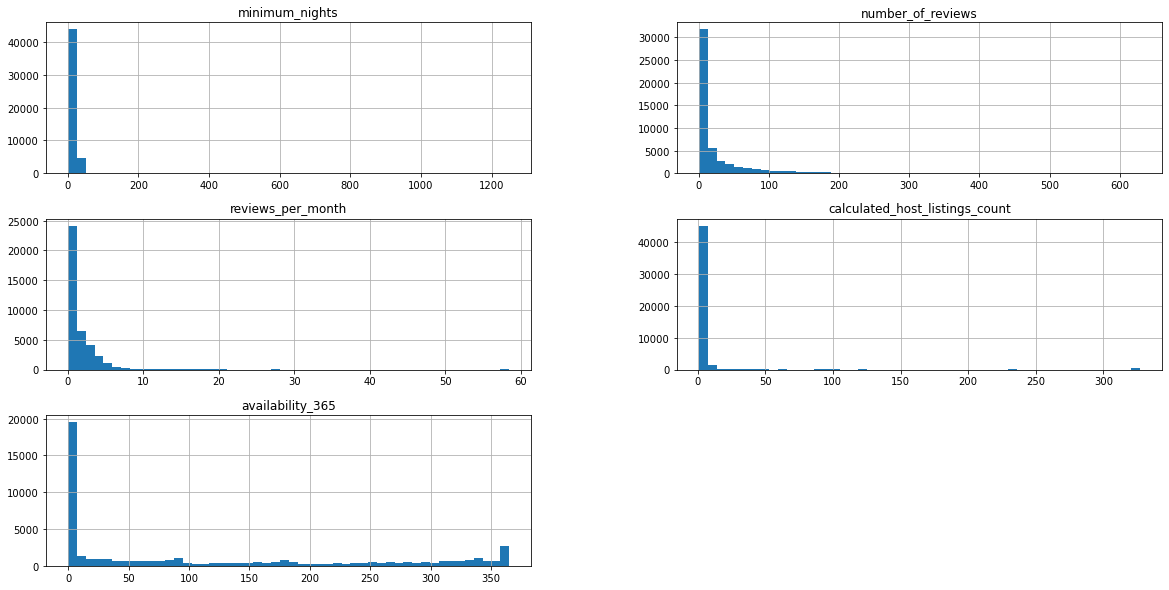

In [275]:
df.loc[:, "minimum_nights": "availability_365"].hist(bins=50, figsize = (20,10))

## Diagrams show there might be outliers in the data, this can be better inspected with boxplots.

number of outliers 239


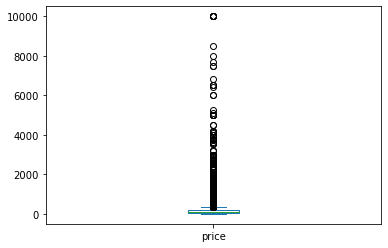

In [276]:
df[['price']].plot.box()
outliers = df[df["price"]>1000]
print("number of outliers", outliers.shape[0])

<AxesSubplot:>

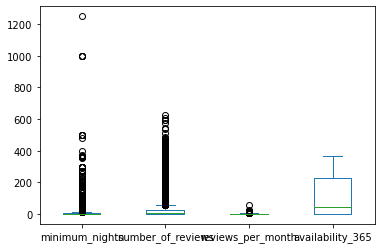

In [277]:
df[['minimum_nights', "number_of_reviews", "reviews_per_month", "availability_365"]].plot.box()

## Pivot table showing the statisticial data.

In [278]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Dropping outliners from the dataset based on histograms and boxplots, also drop down non-functional attributes 'id', 'name', 'host_name', 'last_review', 'host_id'.

In [5]:
df=df[df['price'] < 1000]
df=df[df['minimum_nights']<=365]
df=df[df['number_of_reviews']<=200]
df=df[df['reviews_per_month']<=10] # Drops missing too.
df.drop(['id','name','host_name','last_review', 'host_id'],
axis=1, inplace=True)
print(df.shape)

(38015, 11)


## Check price histogram and data summary on sorted dataset. 

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38015.000000,38015.000000,38015.000000,38015.000000,38015.000000,38015.000000,38015.000000,38015.000000
mean,40.728111,-73.951280,135.595765,5.782875,25.392293,1.303727,5.228541,113.266421
std,0.055096,0.046449,106.529748,13.891266,36.733362,1.527724,26.574928,129.292427
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688665,-73.982435,68.500000,2.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721680,-73.954810,101.000000,2.000000,9.000000,0.690000,1.000000,52.000000
75%,40.762960,-73.935080,170.000000,4.000000,31.000000,1.990000,2.000000,224.000000
max,40.913060,-73.712990,999.000000,365.000000,200.000000,10.000000,327.000000,365.000000


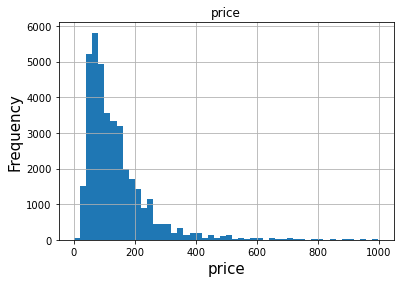

In [6]:
df[['price']].hist(bins=50)
plt.xlabel("price", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
df.describe()

## Listings density plot in NYC

In [7]:
data = pd.read_csv("AB_NYC_2019.csv", usecols=['latitude', 'longitude'])
m = folium.Map([40.7120, -74.0075], zoom_start=11)
HeatMap(data[['latitude','longitude']].dropna(),
radius=8, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1.0: 'red'}).add_to(m)
m

## Theory says that price heavily depends on the neighbourhood group, it can be ensured with the following pivot table and plot.

In [282]:
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,121.207237,57.207364,56.930233
Brooklyn,165.154173,70.866260,45.484429
Manhattan,213.771829,104.422634,78.293447
Queens,137.936183,65.696169,45.081081
Staten Island,125.738255,57.484076,57.600000


Correlation can be measured with correlation matrix.

## Non-numerical data conversion 

In [8]:
neighbourhood_group_source = df['neighbourhood_group'].values.copy()
df_original = df.copy()
print(neighbourhood_group_source)
neighb_conv = preprocessing.LabelEncoder()
neighb_conv.fit(neighbourhood_group_source[:])
neighbourhood_group_source[:] =  neighb_conv.transform(neighbourhood_group_source[:])
neighbourhood_group_source = neighbourhood_group_source.astype('int')
neighbourhood_group_source.astype('int')
df['neighbourhood_group'] = neighbourhood_group_source
print(df['neighbourhood_group'])

['Brooklyn' 'Manhattan' 'Manhattan' ... 'Staten Island' 'Bronx' 'Brooklyn']
0        1
1        2
4        2
5        2
6        1
        ..
48782    2
48790    3
48799    4
48805    0
48852    1
Name: neighbourhood_group, Length: 38015, dtype: int32


In [9]:
room_type_source = df['room_type'].values.copy()
print(room_type_source)
neighb_conv = preprocessing.LabelEncoder()
neighb_conv.fit(room_type_source[:])
room_type_source[:] =  neighb_conv.transform(room_type_source[:])
room_type_source = room_type_source.astype('int')
room_type_source.astype('int')
df['room_type'] = room_type_source
print(df['room_type'])

['Private room' 'Entire home/apt' 'Entire home/apt' ... 'Private room'
 'Entire home/apt' 'Private room']
0        1
1        0
4        0
5        0
6        1
        ..
48782    1
48790    1
48799    1
48805    0
48852    1
Name: room_type, Length: 38015, dtype: int32


In [10]:
neighbourhood_source = df['neighbourhood'].values.copy()
print(neighbourhood_source)
neighb_conv = preprocessing.LabelEncoder()
neighb_conv.fit(neighbourhood_source[:])
neighbourhood_source[:] =  neighb_conv.transform(neighbourhood_source[:])
neighbourhood_source = neighbourhood_source.astype('int')
neighbourhood_source.astype('int')
df['neighbourhood'] = neighbourhood_source
print(df['neighbourhood'])

['Kensington' 'Midtown' 'East Harlem' ... 'Great Kills' 'Mott Haven'
 'Bushwick']
0        107
1        126
4         61
5        136
6         13
        ... 
48782    199
48790     77
48799     89
48805    133
48852     28
Name: neighbourhood, Length: 38015, dtype: int32


## Attributes correlation matrix
First correlation matrix “Figure 8” shows weak price dependence with host id, neighbourhood group and minimum nights, while there is no correlation with room type. Second matric “Figure 9” shows weak price dependency with calculated host listings count and availability throughout the year. Matrix shows that there is the price relation with host id, as host id is not categorical data and not functional, this should be dropped. “Figure 10” is a matrix of strongest dependencies combined and dropped host id.

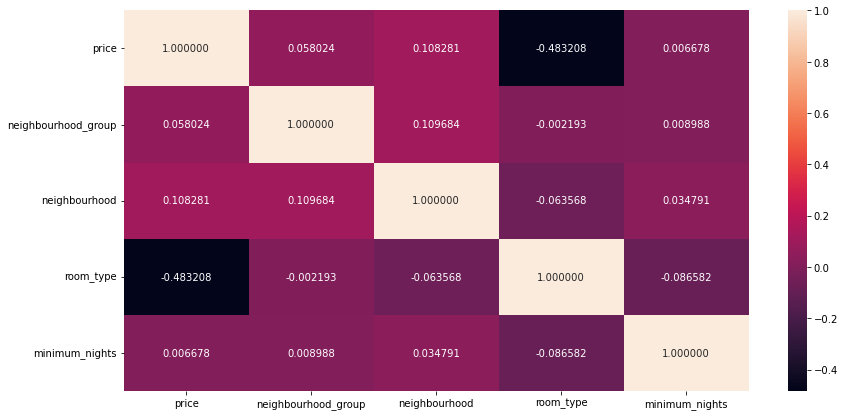

In [286]:
corr_mat = df[['price', 'neighbourhood_group','neighbourhood','room_type','minimum_nights' ]].corr()
plt.figure (figsize = (14,7))
sns.heatmap(corr_mat, annot=True, fmt="f")
plt.xticks(rotation=0)
plt.show()

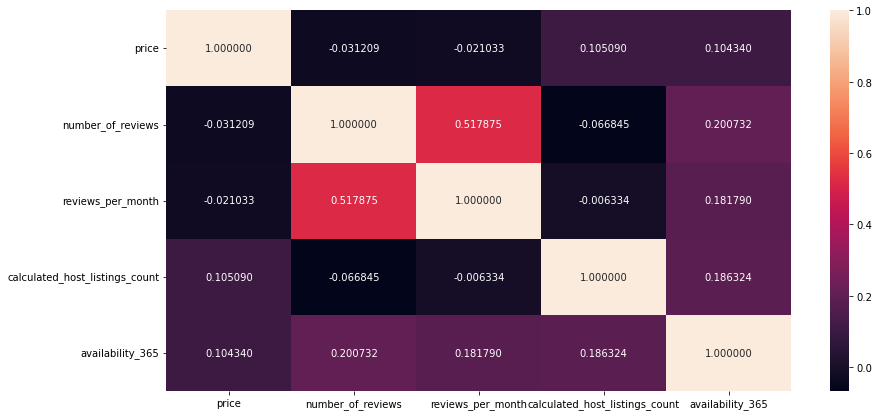

In [287]:
corr_mat = df[['price', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
plt.figure (figsize = (14,7))
sns.heatmap(corr_mat, annot=True, fmt="f")
plt.xticks(rotation=0)
plt.show()

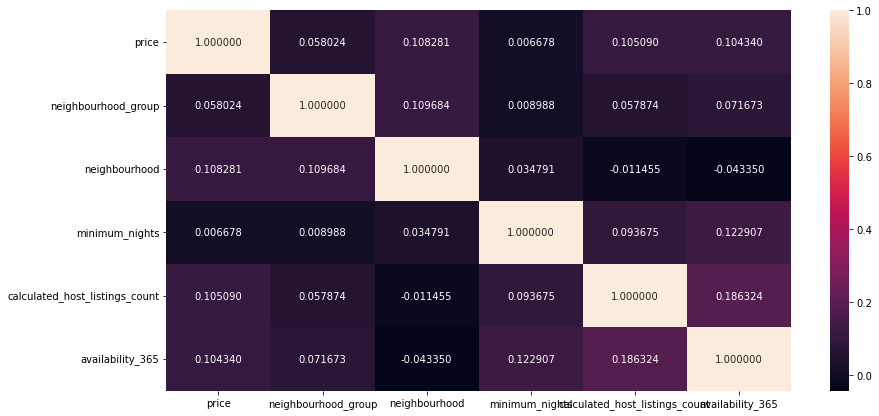

In [288]:
corr_mat = df[['price', 'neighbourhood_group', 'neighbourhood','minimum_nights','calculated_host_listings_count','availability_365']].corr()
plt.figure (figsize = (14,7))
sns.heatmap(corr_mat, annot=True, fmt="f")
plt.xticks(rotation=0)
plt.show()

## Validate correlation between price an neighbourhood, show most expensive listings

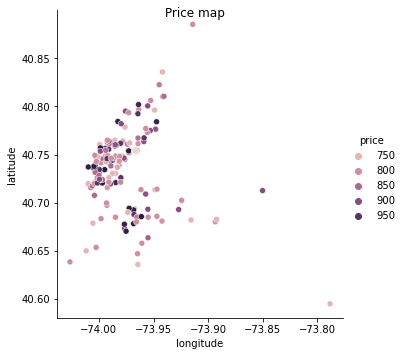

In [289]:
sns_plot = sns.relplot(x="longitude", y='latitude', hue='price',data=df[df['price']>700])
sns_plot.fig.suptitle("Price map")
plt.show()

Strongest correlation has been proven on the real data, most expensive listings are mostly located in Manhattan.

# Classification
Trying to predict room_type is the best task for classification with the chosen dataset. Room type has only three variations. Probably, the accuracy can be improved with external data or existing data transformation, while price and neighbourhood_group will be the primary attributes. Goal is to find out if room_type can be predicted by price and neighbourhood_group. Theory says that central regions should have shared rooms the cheapest, private rooms in the middle and entire apartments for the highest price.

In [290]:
df_original.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,121.207237,57.207364,56.930233
Brooklyn,165.154173,70.866260,45.484429
Manhattan,213.771829,104.422634,78.293447
Queens,137.936183,65.696169,45.081081
Staten Island,125.738255,57.484076,57.600000


In [291]:
from sklearn import tree

import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import svm

## Prepare mean value for the accuracy test function

In [292]:
mean_price = df['price'].mean() # Mean for the regression

## Prepare datasets

In [293]:
X = df[['price', 'neighbourhood_group']].values.copy()
Y = df['room_type'].values.copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.7)

## Prepare "accuracy" function to measure the accuracy of the methods. 
The cross validation procedure is a standard method for estimating the accuracy of a classifier. K-fold parameter has been set to 10 which means 10% of the data is used for testing. It would make sense to use 10 folds for data with 100000 entries resulting in 10000 chosen for testing. The k-fold cross-validation with 10 folds is used to measure the performance of the models, k=10 becoming a 10-fold cross validation is a commonly used in the field of machine learning.

In [294]:
def accuracy(clf):
    cv_scores = cross_val_score(estimator=clf, X=X_test, y=y_test, cv=10)
    return cv_scores.mean()

## Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
bayes_clf = GaussianNB() # 0.723, 0.055s
bayes_clf.fit(X_train, y_train)
start_time = time.time()
bayes_acc = accuracy(bayes_clf)
print('Accuracy GaussianNB bayes', bayes_acc)
end_time = time.time()
bayes_time = end_time-start_time
print("Time for 10 fold CV on bayes is:", bayes_time)

bayes_clf = MultinomialNB() # 0,720, 0.040s
bayes_clf.fit(X_train, y_train)
start_time = time.time()
bayes_acc = accuracy(bayes_clf)
print('Accuracy MultinomialNB bayes', bayes_acc)
end_time = time.time()
bayes_time = end_time-start_time
print("Time for 10 fold CV on bayes is:", bayes_time)

Accuracy GaussianNB bayes 0.731780053975176
Time for 10 fold CV on bayes is: 0.05699658393859863
Accuracy MultinomialNB bayes 0.7091123534416217
Time for 10 fold CV on bayes is: 0.04003024101257324


## Naive Bayes classificator attributes and results
For the numerical data GaussianNB was used, which assumes normal data distribution. For categorical data the MultinominalNB is used.

Accuracy: 72.3% for GaussianNB and 72.0% for MultinomialNB.

## Decision trees

In [80]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf = 2)
tree_clf.fit(X_train, y_train)
start_time = time.time()
tree_acc =  accuracy(tree_clf)
print('Accuracy decision trees', tree_acc)
end_time = time.time()
tree_time = end_time-start_time
print("Time for 5 fold CV on decision trees is:", tree_time)

Accuracy decision trees 0.8103276963642816
Time for 5 fold CV on decision trees is: 0.07503342628479004


In [81]:
from graphviz import Source
crit = 'entropy'
dotfile = export_graphviz(tree_clf, feature_names=['price', 'neighborhood'], class_names=["Entire home/apt", "Private room", "Shared room"], out_file=None, filled=True, node_ids=True)
graph = Source(dotfile)
# Save Decision tree as tree_example_tree_entropy file, where X - entropy
graph.format = 'png'
graph.render("tree_example_tree_{}".format(crit),view=True)

'tree_example_tree_entropy.png'

## Decision trees, main attributes and results

The shared_room class is extremely sparse, and at low values for the Depth of the tree (<5) and high values for min_samples_leaf (> 50), there are no nodes with the result of shared_room in the resulting tree at all.
The optimal parameters were chosen, at which the tree is not very complex and there are nodes with the shared_room class presenting.
Accuracy: 80.6%

## Support Vector Machines (SVM)

In [29]:
#svm_clf = svm.SVC(gamma='scale', kernel='sigmoid') # acc = 0.46, time 85.94s
svm_clf = svm.SVC(gamma='scale', kernel='rbf') # acc = 0.80, time 74.77
#svm_clf = svm.SVC(gamma='scale', kernel='linear') # 0.80, time 1312
svm_clf.fit(X_train, y_train)
start_time = time.time()
SVM_acc = accuracy(svm_clf)
print('Accuracy SVM', SVM_acc)
end_time = time.time()
swm_time = end_time-start_time
print("Time for 5 fold CV on SWM is:", swm_time)

Accuracy SVM 0.806650186772138
Time for 5 fold CV on SWM is: 161.17303490638733


## SVM Results
Kernel is a parameter specifying the core, accuracy and execution speed depends on the core and the most suitable core can be picked based on the data. Kernel "rbf" is the most accurate and also the fastest core (75s), "linear" shows same result of 80.1% accuracy but it took 1312s time, "sigmoid" show poor results of 46% accuracy but worked relatively fast (86s).

## Classification results

In [32]:
d = {"value": ["acc", "time"], "decision trees": [tree_acc, tree_time], "Naive Bayes": [bayes_acc, bayes_time], "SVM": [SVM_acc, swm_time] }
table = pd.DataFrame(data = d)
print(table)

  value  decision trees  Naive Bayes         SVM
0   acc        0.809540     0.712414    0.806650
1  time        0.074024     0.041000  161.173035


## Classification recommendations
Classification method should be picked based on the data being processed, data distribution, size, format. Naive Bayes classificator doesn't work properly for the abnormally distributed data, while this is calculated fast and can be applied for the larger datasets. 
Decision tree is suitable for the tasks where visibility and decision interpretability are crucial.
Support Vector Machines method has the highest calculation cost (time), probably it's worth first try the decision tree method and then, if necessary, try the SVM (support vector machine).

# Regression
Price for the apartment will be predicted according to the room type and neighbourhood. The mean_error/mean_value formula will be applied to measure the model performance. 	

## Import required libraries for the linear model

In [295]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np 

# Prepare datasets
Data has been analyzed and sorted in the previous steps, new train and test datasets should be made to contain data required for the new regression to predict price. Price for prediction has been selected separately as attribute for the prediction.

## Prepare price data


In [296]:
Y = df['price'].values.copy()

## Prepare train and test datasets

In [297]:
X = df[['room_type', 'neighbourhood_group', 'latitude', 'longitude']].values.copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)

## Linear Regression

In [298]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Training 
y_pred = regressor.predict(X_test)

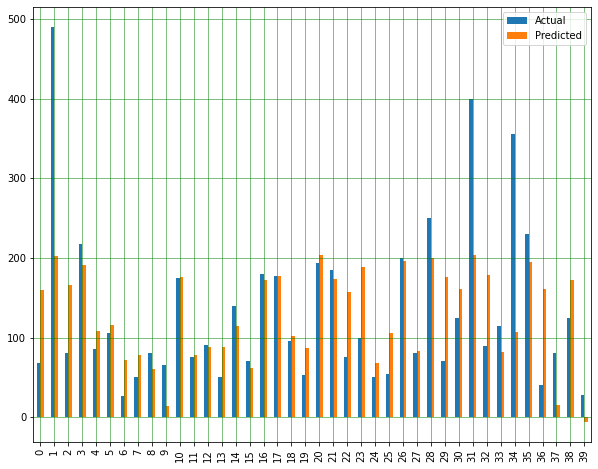

In [299]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [300]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
LR_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
LR_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
LR_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 54.05353334605293
Mean Squared Error: 8228.12922431871
Root Mean Squared Error: 90.7090360676306
relative error 0.3987589140787031
R^2 0.2794420828008861
time:  0.0020003318786621094


## Reduce prediction range
The model show very poor results, outliers (n>1000) were removed from the data already, most of the values are within 0-400 range, so dropping ranges out of it might improve the model.

In [301]:
df=df[df['price'] < 400]

Y = df['price'].values.copy()

X = df[['room_type', 'neighbourhood_group', 'latitude', 'longitude']].values.copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)

In [302]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # Training 
y_pred = regressor.predict(X_test)

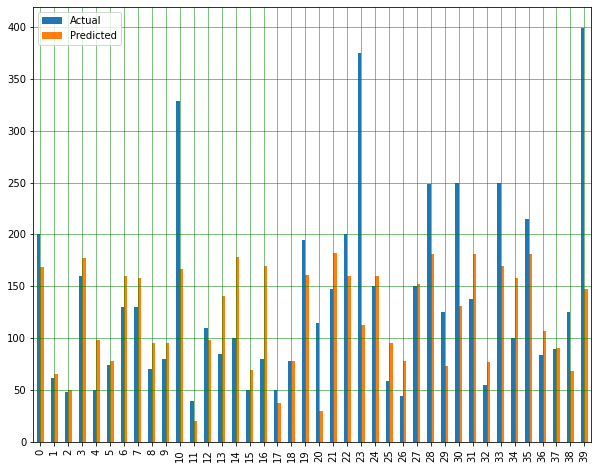

In [303]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [304]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
LR_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
LR_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
LR_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 41.0533891337769
Mean Squared Error: 3232.0780056666217
Root Mean Squared Error: 56.85136766751194
relative error 0.30285540753518014
R^2 0.40268532344464336
time:  0.0030007362365722656


R^2 has been improved, from 0.28 to 0.40, this is a significant improvement, further models will be applied on the reduced size dataset.

## Ridge regression

In [313]:
regressor = Ridge()
regressor.fit(X_train, y_train) # Training 
y_pred = regressor.predict(X_test)

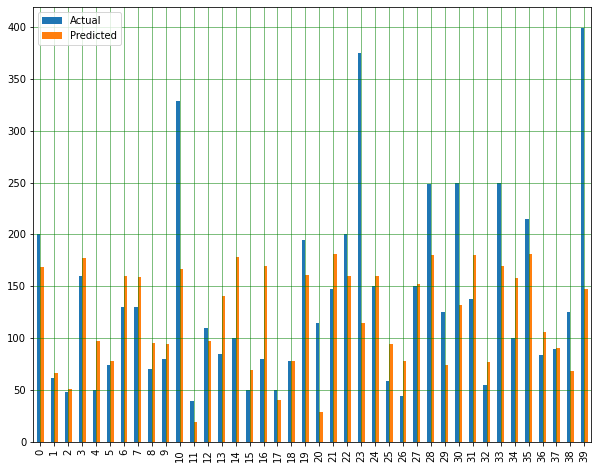

In [314]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [315]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
Ridge_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
Ridge_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
Ridge_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 41.05208913242377
Mean Squared Error: 3232.4714553482204
Root Mean Squared Error: 56.854827898325574
relative error 0.30285540753518014
R^2 0.4026126106979544
time:  0.0030007362365722656


## Lasso

In [316]:
regressor = Lasso() 
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

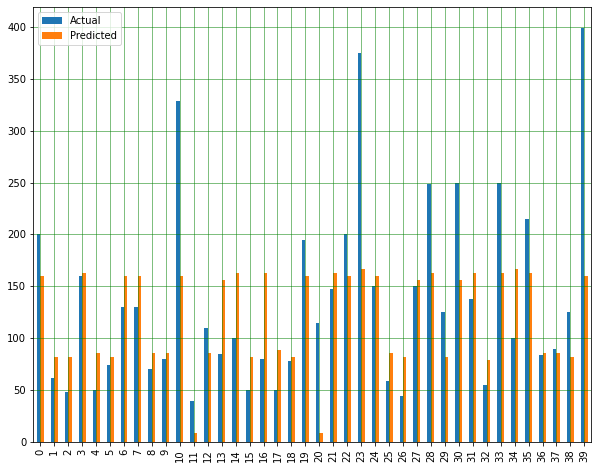

In [317]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [318]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
Lasso_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
Lasso_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
Lasso_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 43.5168772546846
Mean Squared Error: 3502.803319775741
Root Mean Squared Error: 59.184485465160044
relative error 0.30285540753518014
R^2 0.35265305220956744
time:  0.0030007362365722656


## Elastic-net

In [361]:
regressor = ElasticNet(alpha=0.001)
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

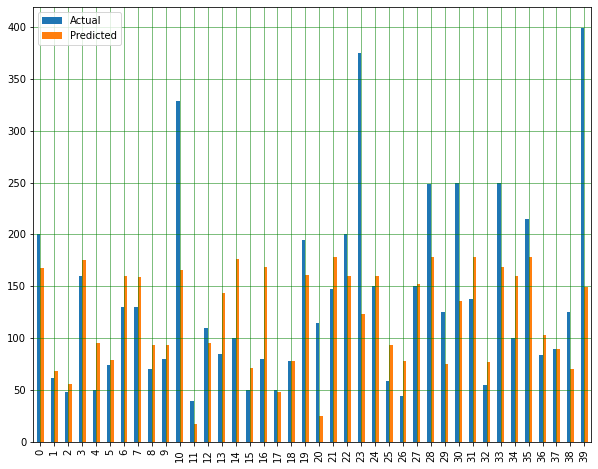

In [362]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [363]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
EN_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
EN_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
EN_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 41.115367994940414
Mean Squared Error: 3241.711054804337
Root Mean Squared Error: 56.93602598359265
relative error 0.30285540753518014
R^2 0.40090505650187525
time:  0.0030007362365722656


#### Elastic Net - alpha has been set to 0.001 as it lifted R^2 from 21% back to 40%.

Results for Elastic Net with alpha = 1
```
Mean Absolute Error: 49.87572487356842
Mean Squared Error: 4267.152975811097
Root Mean Squared Error: 65.32344889709282
relative error 0.30285540753518014
R^2 0.21139493072564886
time:  0.0030007362365722656
```

Achieved result of R^2 ~0.40, while relative error shows that average predicted value differs to 30%.

Results aren't very good, probably because of the non-linear dependence in the data.

# Taking non-linear dependence into account

## Polynomial regression

In [335]:
regressor = Pipeline([('poly', PolynomialFeatures(degree=5)), ('linear', LinearRegression(fit_intercept=False))])
regressor.fit(X_train, y_train) # Training
y_pred = regressor.predict(X_test)

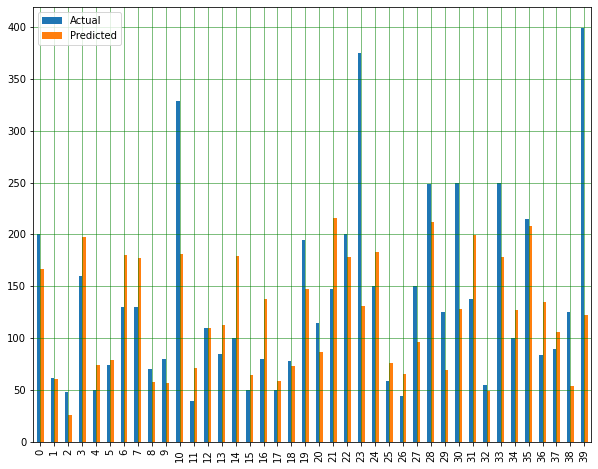

In [336]:
dff = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = dff.head(40)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [337]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
start = time.time()
Pol_rel_err = metrics.mean_absolute_error(y_test, y_pred)/ mean_price
print("relative error", LR_rel_err)
Pol_score = regressor.score(X_test, y_test)
print('R^2', metrics.r2_score(y_test, y_pred))
end = time.time()
Pol_time = end - start
print("time: ", LR_time)

Mean Absolute Error: 37.249304025055096
Mean Squared Error: 2833.7018813676873
Root Mean Squared Error: 53.232526535640666
relative error 0.30285540753518014
R^2 0.47630851738235147
time:  0.0030007362365722656


## Polynomial regression parameters and results

Setting degree to 5 improved the model:

Results for polynomial regression with default 1 degree
```
Mean Absolute Error: 41.05338913376738
Mean Squared Error: 3232.0780056666636
Root Mean Squared Error: 56.85136766751231
relative error 0.30285540753518014
R^2 0.4026853234446356
time:  0.0030007362365722656
```

Setting degree to 5 recuced mean absolute error and increased R^2 from 40 to 47 which is a decent improvement.

The algorithm works optimally with polynom to the power three (degree = 5). Polynom regression increased the R^2 by 7%, the achieved value is 0.47.

## Regression spreadsheet

In [364]:
d = {"value": ["R^2", "time"], "Linear regr": [LR_score, LR_time], "Ridge": [Ridge_score, Ridge_time], "Lasso": [Lasso_score, Lasso_time], "Elastic_net": [EN_score, EN_time], "Polynomial": [Pol_score, Pol_time] }
table = pd.DataFrame(data = d)
print(table)

  value  Linear regr     Ridge     Lasso  Elastic_net  Polynomial
0   R^2     0.402685  0.402613  0.352653     0.400905    0.476309
1  time     0.003001  0.001999  0.003000     0.003000    0.030000


# Conclusion

Linear regression methods allow detecting linear dependencies, however, in this case, polynomial regression increases the accuracy because of the non-linear dependence in the data but slows down the calculation speed. Too wide prediction range was very harmful for the regression model, reducing the prediction and data range doubled the model performance.

Regressions might have shown a better result if more features would have been added to the training dataset. The model can be evaluated with more features and more customized parameters. Modifying the data and prediction range affects the aimed group prediction significantly.